In [ ]:
import tensorflow as tf
# Mengimpor TensorFlow sebagai framework utama machine learning

from tensorflow import keras
# Mengimpor Keras API dari TensorFlow

from tensorflow.keras import layers
# Mengimpor layer-layer neural network (Dense, Normalization, dll)

import numpy as np
# Mengimpor NumPy untuk operasi numerik

import pandas as pd
# Mengimpor Pandas untuk pengolahan data tabular

import matplotlib.pyplot as plt
# Mengimpor Matplotlib untuk visualisasi grafik

np.set_printoptions(precision=3, suppress=True)
# Mengatur format tampilan angka NumPy (3 desimal, tanpa notasi ilmiah)

In [ ]:
url = '/content/drive/MyDrive/Triad/Kuliah/Machine Learning/src/autompg/auto-mpg.data'
# Path file dataset Auto MPG

column_names = [
    'MPG', 'Cylinders', 'Displacement', 'Horsepower',
    'Weight', 'Acceleration', 'Model Year', 'Origin'
]
# Nama kolom dataset

dataset = pd.read_csv(
    url,
    names=column_names,
    na_values='?',
    comment='\t',
    sep=' ',
    skipinitialspace=True
)
# Membaca dataset Auto MPG dari file
# '?' dianggap sebagai missing value (NaN)


# dataset.head()
dataset.tail()
# Menampilkan beberapa baris terakhir dataset (untuk inspeksi)

In [ ]:
origin = dataset.pop('Origin')
# Mengeluarkan kolom 'Origin' dari dataset dan menyimpannya ke variabel origin

dataset['USA'] = (origin == 1) * 1
dataset['Europe'] = (origin == 2) * 1
dataset['Japan'] = (origin == 3) * 1
# One-hot encoding manual untuk kolom Origin

KeyError: 'Origin'

In [ ]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
# Mengambil 80% data secara acak sebagai data training

test_dataset = dataset.drop(train_dataset.index)
# Sisa 20% data dijadikan data testing


print(dataset.shape, train_dataset.shape, test_dataset.shape)
# Menampilkan ukuran dataset total, training, dan testing

train_dataset.describe().transpose()
# Menampilkan statistik deskriptif data training

(392, 10) (314, 10) (78, 10)


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
# Menyalin dataset agar tidak mengubah data asli

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')
# Memisahkan target (label) MPG dari fitur input

In [ ]:
def plot(feature, x=None, y=None):
  plt.figure(figsize=(10,8))
  # Membuat figure baru

  plt.scatter(train_features[feature], train_labels, label='Data')
  # Scatter plot data asli (fitur vs MPG)

  if x is not None and y is not None:
    plt.plot(x, y, color='k', label='Predictions')
    # Plot garis prediksi model jika tersedia

  plt.xlabel(feature)
  plt.ylabel('MPG')
  plt.legend()
  # Mengatur label dan legenda grafik

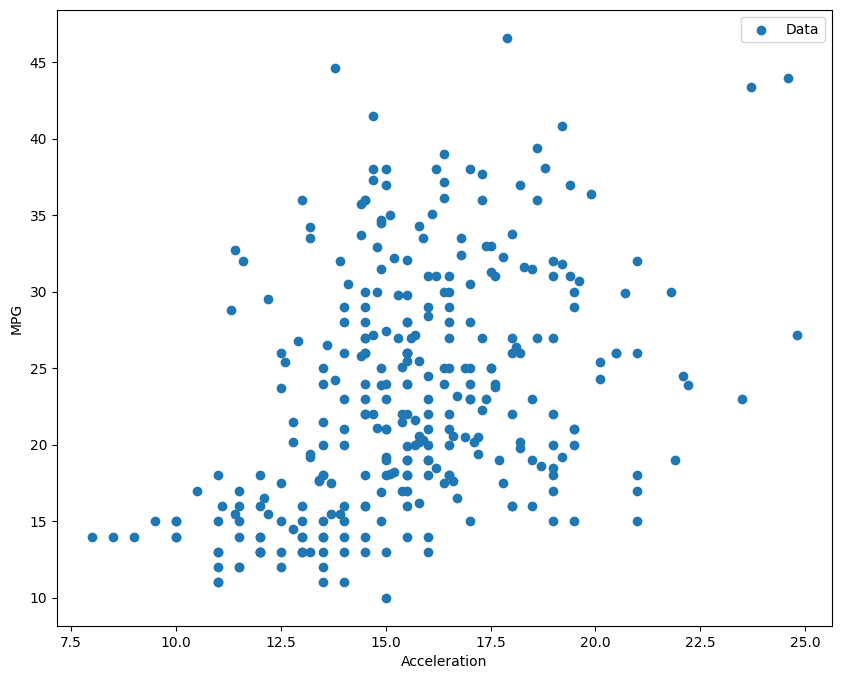

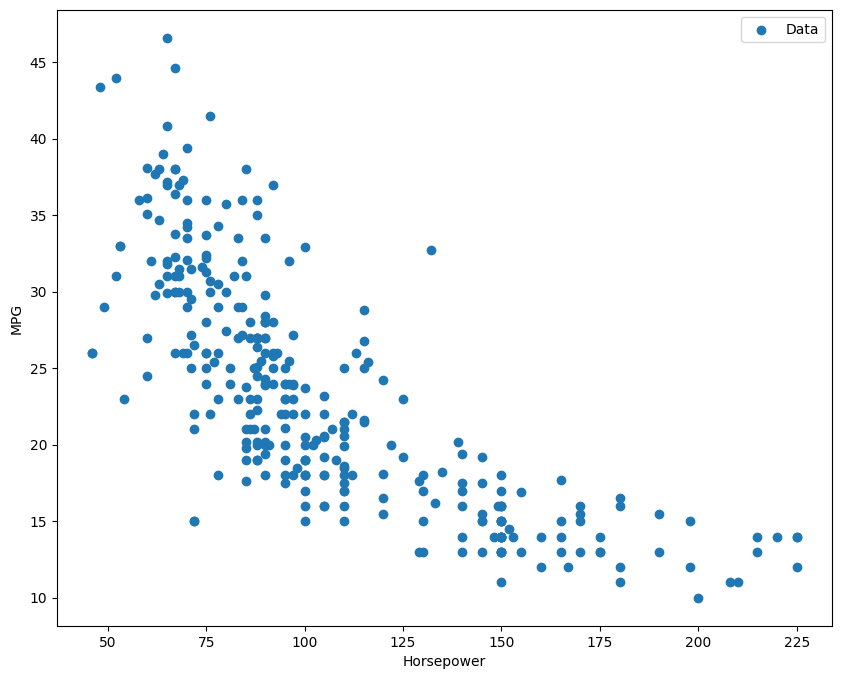

In [ ]:
plot('Acceleration')
plot('Horsepower')

In [ ]:
print(train_dataset.describe().transpose()[['mean', 'std']])
# Menampilkan mean dan standar deviasi setiap fitur


normalizer = layers.Normalization()
# Membuat layer Normalization

normalizer.adapt(np.array(train_features))
# Menghitung mean dan variance dari seluruh fitur training


print(normalizer.mean.numpy())
# Menampilkan mean hasil normalisasi

                     mean         std
MPG             23.310510    7.728652
Cylinders        5.477707    1.699788
Displacement   195.318471  104.331589
Horsepower     104.869427   38.096214
Weight        2990.251592  843.898596
Acceleration    15.559236    2.789230
Model Year      75.898089    3.675642
USA              0.624204    0.485101
Europe           0.178344    0.383413
Japan            0.197452    0.398712
[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.624    0.178
     0.197]]


In [ ]:
first = np.array(train_features[:1])
# Mengambil satu contoh data training

print('First example:', first)
print('Normalized:', normalizer(first).numpy())
# Menampilkan data asli dan hasil normalisasinya

First example: [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalized: [[-0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


In [ ]:
feature = 'Horsepower'
# Memilih satu fitur untuk single-feature regression

single_feature = np.array(train_features[[feature]])
# Mengambil fitur Horsepower dengan shape (N, 1)

print(single_feature.shape, train_features.shape)
# Menampilkan bentuk data single feature dan multi-feature


single_feature_normalizer = layers.Normalization()
# Membuat normalizer khusus untuk satu fitur

single_feature_normalizer.adapt(single_feature)
# Menghitung statistik normalisasi fitur Horsepower


(314, 1) (314, 9)


In [ ]:
single_feature_model = keras.models.Sequential([
    single_feature_normalizer,
    layers.Dense(units=1)
])
# Model regresi linear sederhana (1 input → 1 output)

In [ ]:
single_feature_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_13                │ (314, 1)               │             3 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (16.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3 (16.00 B)

In [ ]:
loss = keras.losses.MeanAbsoluteError()
# Fungsi loss MAE (Mean Absolute Error)

optim = keras.optimizers.Adam(learning_rate=0.1)
# Optimizer Adam dengan learning rate cukup besar


single_feature_model.compile(loss=loss, optimizer=optim)
# Mengonfigurasi model

In [ ]:
history = single_feature_model.fit(
    train_features[feature],
    train_labels,
    epochs=100,
    verbose=1,
    validation_split=0.2
)
# Melatih model regresi single feature

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 23.1480 - val_loss: 22.9366
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.0535 - val_loss: 22.1366
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.6501 - val_loss: 21.3362
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.7604 - val_loss: 20.5362
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19.9179 - val_loss: 19.7363
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.8876 - val_loss: 18.9363
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17.9019 - val_loss: 18.1366
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17.1942 - val_loss: 17.3366
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17.5222 - val_loss: 16.5363
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 15.6481 - val_loss: 15.7365
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.8507 - val_loss: 14.9365
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

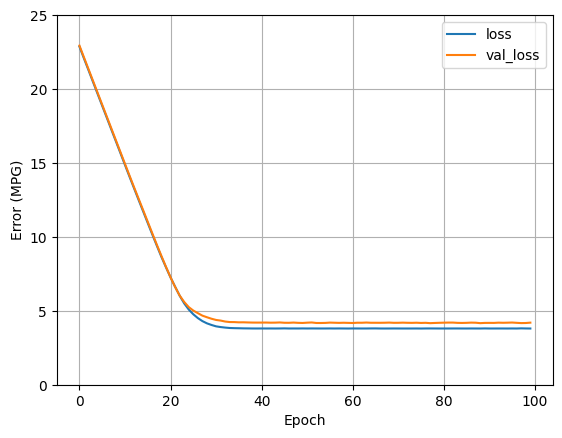

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 25])
  plt.xlabel('Epoch')
  plt.ylabel('Error (MPG)')
  plt.legend()
  plt.grid(True)
  # Fungsi untuk memplot loss training dan validation

In [ ]:
single_feature_model.evaluate(
    test_features[feature],
    test_labels,
    verbose=1
)
# Evaluasi model single feature menggunakan data testing

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.5738


3.6522228717803955

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


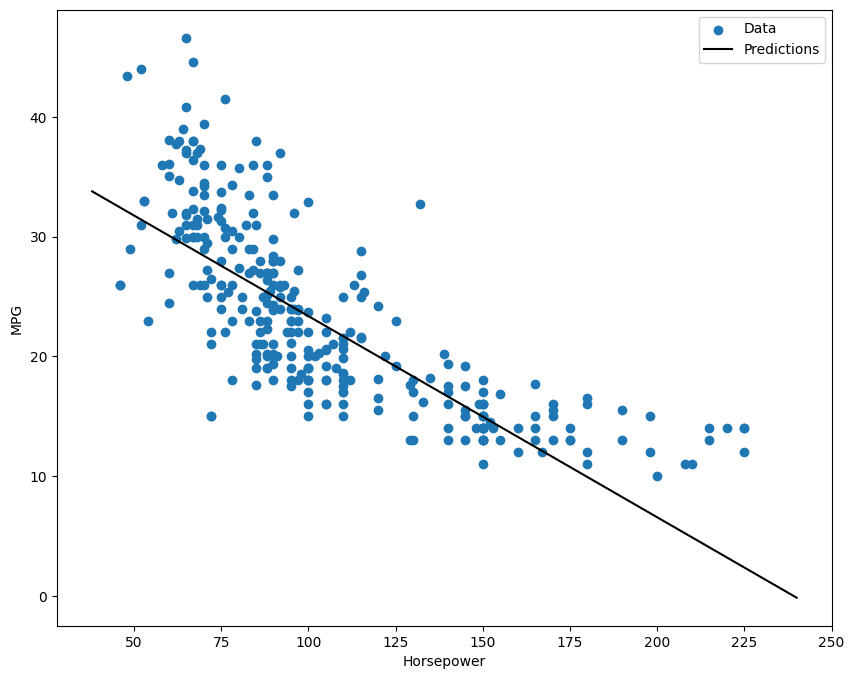

In [ ]:
range_min = np.min(test_features[feature]) - 10
range_max = np.max(test_features[feature]) + 10
# Menentukan rentang nilai fitur untuk visualisasi prediksi


x = tf.linspace(range_min, range_max, 200)
# Membuat 200 titik input untuk prediksi

y = single_feature_model.predict(x)
# Menghasilkan prediksi MPG

plot(feature, x, y)
# Plot data asli dan garis regresi

In [ ]:
dnn_model = keras.Sequential([
    single_feature_normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
# Model Deep Neural Network dengan 2 hidden layer

In [ ]:
dnn_model.compile(
    loss=loss,
    optimizer=keras.optimizers.Adam(learning_rate=0.001)
)
# Compile model DNN

dnn_model.summary()
# Menampilkan ringkasan model DNN

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_13                │ (None, 1)              │             3 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (16.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3 (16.00 B)

In [ ]:
dnn_model.fit(
    train_features[feature],
    train_labels,
    validation_split=0.2,
    verbose=1,
    epochs=100
)
# Melatih model DNN

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 22.9126 - val_loss: 23.4390
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 23.1052 - val_loss: 23.1712
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 22.3688 - val_loss: 22.8435
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 23.3492 - val_loss: 22.4036
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 21.6995 - val_loss: 21.8197
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 21.1821 - val_loss: 21.0537
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.7149 - val_loss: 20.0562
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 18.3022 - val_loss: 18.8041
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.8490 - val_loss: 17.3565
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.9807 - val_loss: 15.7895
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15.1807 - val_loss: 14.1662
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step -

In [ ]:
dnn_model.evaluate(test_features[feature], test_labels, verbose=1)
# Evaluasi performa model DNN

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.7670


2.902885675430298

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


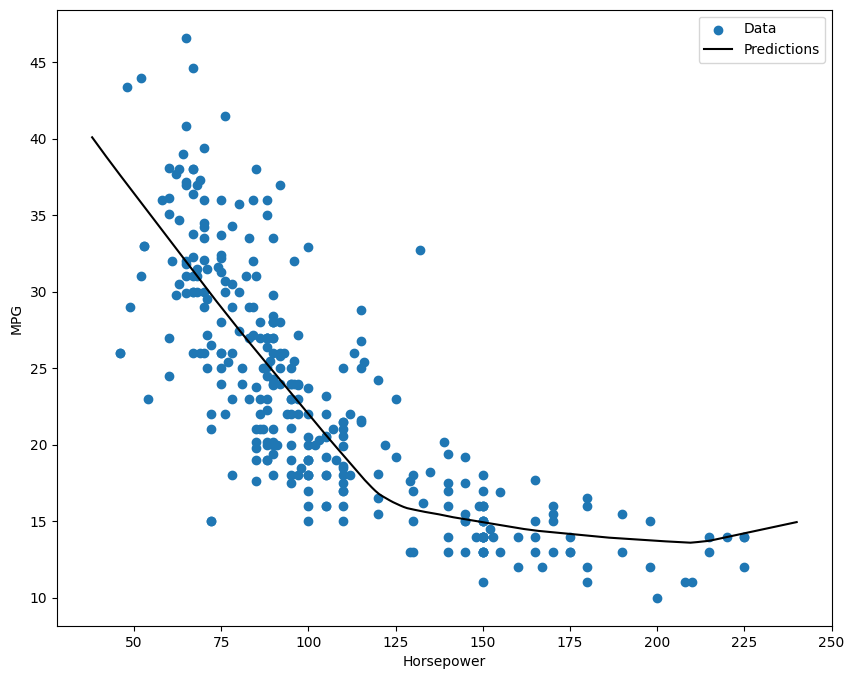

In [ ]:
x = tf.linspace(range_min, range_max, 200)
y = dnn_model.predict(x)
# Prediksi menggunakan DNN

plot(feature, x, y)
# Visualisasi hasil prediksi DNN

In [ ]:
linear_model = keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
# Model regresi linear multi-feature


linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=loss
)
# Compile model multi-feature

In [ ]:
linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=1,
    validation_split=0.2
)
# Melatih model regresi dengan semua fitur

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 22.5808 - val_loss: 23.2131
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.5117 - val_loss: 22.4712
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.6955 - val_loss: 21.7533
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.1518 - val_loss: 21.0336
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.7260 - val_loss: 20.3092
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.7327 - val_loss: 19.6250
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18.3624 - val_loss: 18.8776
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.9572 - val_loss: 18.1627
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.2856 - val_loss: 17.4381
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.2533 - val_loss: 16.6906
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 15.1684 - val_loss: 15.9467
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

In [ ]:
linear_model.evaluate(test_features, test_labels, verbose=1)
# Evaluasi model multi-feature

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.4468


2.5511631965637207

In [ ]:
# ============================================================
# Ringkasan Konsep: Mengapa Normalisasi Dibutuhkan pada Model Linear (TensorFlow)
#
# Dalam dataset (contoh: Auto MPG), setiap fitur memiliki skala nilai berbeda:
# - Weight        : ribuan (berat kendaraan)
# - Horsepower    : puluhan hingga ratusan
# - Cylinders     : satuan kecil (± 3–8)
#
# Jika data ini langsung digunakan TANPA normalisasi:
# - Fitur dengan nilai besar (Weight) akan mendominasi perhitungan gradien
# - Fitur kecil (Cylinders) menjadi "kurang terdengar"
# - Optimizer berbasis gradient (Adam / SGD) menjadi tidak stabil
# - Learning rate sulit ditentukan (terlalu kecil → lambat, terlalu besar → divergen)
#
# Normalisasi menyetarakan skala semua fitur dengan rumus:
#     x_norm = (x - mean) / std
#
# Dampak normalisasi:
# - Semua fitur berada pada skala yang sebanding
# - Gradien menjadi lebih seimbang
# - Permukaan loss lebih "bulat"
# - Proses training lebih cepat dan stabil
#
# Penting:
# - Normalisasi TIDAK menghilangkan informasi fitur
# - Hanya mengubah skala numerik agar adil bagi optimizer
#
# Peran Normalization layer di TensorFlow:
# - Menghitung mean & variance dari data training (adapt)
# - Statistik disimpan di dalam model
# - Mencegah data leakage
# - Menjamin konsistensi saat inference
#
# Catatan penting:
# - Normalizer multi-feature harus di-adapt dengan seluruh fitur
# - Normalizer single-feature hanya boleh di-adapt dengan satu fitur
# - Shape data saat adapt() HARUS sama dengan shape saat training
#
# Kesimpulan:
# Normalisasi bukan kewajiban matematis,
# tetapi kebutuhan numerik penting untuk training model
# berbasis gradient di TensorFlow.
# ============================================================
